In [ ]:
import pandas as pd 
import numpy as np 
from keras.models import Sequential
from keras.datasets import imdb
from keras.layers import Dense,LSTM
from keras.layers.embeddings import Embedding 
from keras.preprocessing import sequence

In [ ]:
np.random.seed(7)

(Xtrain,y_train),(x_test,y_test)=imdb.load_data(num_words=6000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
X_train=sequence.pad_sequences(Xtrain,maxlen=500)
X_test=sequence.pad_sequences(x_test,maxlen=500)

In [ ]:
model=Sequential()
model.add(Embedding(6000,32,input_length=500))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           192000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 245,301
Trainable params: 245,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=3,batch_size=64)

Epoch 1/3
391/391 [==============================] - 238s 603ms/step - loss: 0.5041 - accuracy: 0.7444
Epoch 2/3
391/391 [==============================] - 225s 576ms/step - loss: 0.3072 - accuracy: 0.8739
Epoch 3/3
391/391 [==============================] - 294s 753ms/step - loss: 0.2427 - accuracy: 0.9065


In [ ]:
model.evaluate(X_test,y_test)

# **Spam.csv**

In [ ]:
data=pd.read_csv("/content/spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.drop(['Unnamed: 2','Unnamed: 3',"Unnamed: 4"],axis=1,inplace=True)

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
X=data.v2
y=data.v1
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

y=le.fit_transform(y).reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.15,random_state=1)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer 

max_words=1000
max_len=150

tok=Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)

sequences=tok.texts_to_sequences(x_train)

sequence_matrix=sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input,LSTM,Dense,Activation,Dropout
from keras.layers.embeddings import Embedding 

In [ ]:
def rnn():
  inputs =Input(name='input',shape=[max_len])
  layer=Embedding(max_words,50,input_length=max_len)(inputs)
  layer=LSTM(64)(layer)
  layer=Dense(256,name='FC1')(layer)
  layer=Activation('relu')(layer)
  layer=Dropout(0.5 )(layer)
  layer=Dense(1,name='out_layer')(layer)
  layer=Activation('sigmoid')(layer)
  model=Model(inputs=inputs,outputs=layer)
  return model

In [ ]:
model=rnn()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 150)]             0         
                                                                 
 embedding_6 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_6 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_9 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model.fit(sequence_matrix,y_train,epochs=10,batch_size=128,validation_split=0.2,
          callbacks=EarlyStopping(monitor='val_loss',min_delta=0.0001))

Epoch 1/10
30/30 [==============================] - 16s 307ms/step - loss: 0.4520 - accuracy: 0.8516 - val_loss: 0.2363 - val_accuracy: 0.8829
Epoch 2/10
30/30 [==============================] - 9s 310ms/step - loss: 0.1595 - accuracy: 0.9403 - val_loss: 0.0648 - val_accuracy: 0.9821


In [ ]:
x_test=tok.texts_to_sequences(x_test)
x_test_seqpadded=sequence.pad_sequences(sequences,maxlen=150)

In [ ]:
model.evaluate(x_test_seqpadded,y_test)

# **`Judge data`**

In [ ]:
df=pd.read_csv('/content/judge-1377884607_tweet_product_company.csv',encoding='latin-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [ ]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [ ]:
df.rename({'emotion_in_tweet_is_directed_at':'object','is_there_an_emotion_directed_at_a_brand_or_product':'emotions'},axis=1,inplace=True)

In [ ]:
df['emotions'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotions, dtype: int64

In [ ]:
df.drop('object',axis=1,inplace=True)

In [ ]:
df

,tweet_text,emotions
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product


In [ ]:
def preprocess(text):
  import re
  text=re.sub('@[A-Za-z0-9]\S+','',str(text))
  text=re.sub('[^A-Za-z]',' ',text)
  return text

In [ ]:
preprocess('@gcgvgvv hbhbh !@#$$$ 23455')

' hbhbh             '

In [ ]:
df['tweet_text']=df['tweet_text'].apply(preprocess)

In [ ]:
df.head()

,tweet_text,emotions
0,I have a G iPhone After hrs tweeting at ...,Negative emotion
1,Know about Awesome iPad iPhone app that yo...,Positive emotion
2,Can not wait for iPad also They should sa...,Positive emotion
3,I hope this year s festival isn t as crashy a...,Negative emotion
4,great stuff on Fri SXSW Marissa Mayer Goog...,Positive emotion


In [ ]:
"""from  sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(df['emotions']).reshape(-1,1)"""

"from  sklearn.preprocessing import LabelEncoder\nle=LabelEncoder()\ny=le.fit_transform(df['emotions']).reshape(-1,1)"

In [ ]:
y

array([[0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=uint8)

In [ ]:
y=pd.get_dummies(df['emotions']).values

In [ ]:
y

array([[0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=uint8)

In [ ]:
X=df['tweet_text']

In [ ]:
X

0         I have a  G iPhone  After   hrs tweeting at ...
1        Know about    Awesome iPad iPhone app that yo...
2        Can not wait for  iPad   also  They should sa...
3        I hope this year s festival isn t as crashy a...
4        great stuff on Fri  SXSW  Marissa Mayer  Goog...
                              ...                        
9088                        Ipad everywhere   SXSW  link 
9089    Wave  buzz    RT  We interrupt your regularly ...
9090    Google s Zeiger  a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092                                              RT  ...
Name: tweet_text, Length: 9093, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tok=Tokenizer(3000)

tok.fit_on_texts(x_train)
x_train_se=tok.texts_to_sequences(x_train)

x_test_se=tok.texts_to_sequences(x_test)

In [ ]:
from keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(x_train_se,maxlen=150)
x_test=pad_sequences(x_test_se,maxlen=150)

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input,LSTM,Dense,Activation,Dropout
from keras.layers.embeddings import Embedding 

In [ ]:
max_len=150
def rnn():
  inputs =Input(name='input',shape=[max_len])
  layer=Embedding(3000,50,input_length=max_len)(inputs)
  layer=LSTM(64)(layer)
  layer=Dense(256,name='FC1')(layer)
  layer=Activation('relu')(layer)
  layer=Dropout(0.5 )(layer)
  layer=Dense(4,name='out_layer')(layer)
  layer=Activation('softmax')(layer)
  model=Model(inputs=inputs,outputs=layer)
  return model

In [ ]:
model=rnn()

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 150)]             0         
                                                                 
 embedding_12 (Embedding)    (None, 150, 50)           150000    
                                                                 
 lstm_12 (LSTM)              (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_21 (Activation)  (None, 256)               0         
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 4)                 1028

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
91/91 [==============================] - 15s 134ms/step - loss: 0.9690 - accuracy: 0.5877 - val_loss: 0.8835 - val_accuracy: 0.6089
Epoch 2/10
91/91 [==============================] - 13s 143ms/step - loss: 0.8288 - accuracy: 0.6216 - val_loss: 0.8313 - val_accuracy: 0.6289
Epoch 3/10
91/91 [==============================] - 22s 238ms/step - loss: 0.6901 - accuracy: 0.7060 - val_loss: 0.8232 - val_accuracy: 0.6433
Epoch 4/10
91/91 [==============================] - 19s 213ms/step - loss: 0.5747 - accuracy: 0.7680 - val_loss: 0.8502 - val_accuracy: 0.6440
Epoch 5/10
91/91 [==============================] - 12s 128ms/step - loss: 0.5014 - accuracy: 0.8001 - val_loss: 0.9188 - val_accuracy: 0.6399
Epoch 6/10
91/91 [==============================] - 12s 128ms/step - loss: 0.4503 - accuracy: 0.8172 - val_loss: 0.9666 - val_accuracy: 0.6509
Epoch 7/10
91/91 [==============================] - 12s 128ms/step - loss: 0.3940 - accuracy: 0.8421 - val_loss: 1.0639 - val_accuracy: 0.6454

In [ ]:
model.evaluate(x_test,y_test)

57/57 [==============================] - 3s 49ms/step - loss: 1.2649 - accuracy: 0.6322


[1.2648905515670776, 0.6322154998779297]

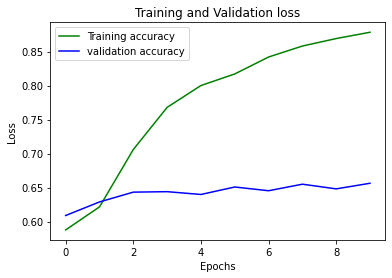

In [ ]:
import matplotlib.pyplot as plt
 
loss_train = history.history['accuracy']

loss_val = history.history['val_accuracy']

epochs = range(1,35)

plt.plot(loss_train, 'g', label='Training accuracy')

plt.plot(loss_val, 'b', label='validation accuracy')

plt.title('Training and Validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

# **`Cellphone data`**

In [ ]:
df=pd.read_csv("/content/CellPhonesRating.csv")

In [ ]:
df.head()

,Unnamed: 0,reviewerID,productID,reviewerName,helpful,reviewText,rating,summary,unixReviewTime,reviewTime
0,0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4.0,Looks Good,1.400630e+09,"05 21, 2014"
1,1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5.0,Really great product.,1.389658e+09,"01 14, 2014"
2,2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5.0,LOVE LOVE LOVE,1.403741e+09,"06 26, 2014"
3,3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4.0,Cute!,1.382314e+09,"10 21, 2013"
4,4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5.0,leopard home button sticker for iphone 4s,1.359850e+09,"02 3, 2013"


In [ ]:
df['rating'].value_counts()

5.0    681
4.0    333
3.0    157
1.0    157
2.0    117
Name: rating, dtype: int64

In [ ]:
for i in range(len(df)):
  if(df['rating'][i] <= 2):
    df['rating'][i]= 'low'
  else:
    df['rating'][i] = 'high'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df['rating'].value_counts()

high    1172
low      274
Name: rating, dtype: int64

In [ ]:
y=df['rating'].values
x=df['reviewText']

In [ ]:
def preprocess(text):
  import re
  text=re.sub('[^A-Za-z]',' ',text)
  return text
df['reviewText']=df['reviewText'].astype('str')
df['reviewText']=df['reviewText'].apply(preprocess)

In [ ]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [ ]:
y=pd.get_dummies(df['rating'].values).values

In [ ]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
tok=Tokenizer(3000)

tok.fit_on_texts(x_train)

x_train_se=tok.texts_to_sequences(x_train)

x_test_se=tok.texts_to_sequences(x_test)

x_train=pad_sequences(x_train_se,maxlen=150)

x_test=pad_sequences(x_test_se,maxlen=150)

In [ ]:
max_len=150
def rnn():
  inputs =Input(name='input',shape=[max_len])
  layer=Embedding(3000,50,input_length=max_len)(inputs)
  layer=LSTM(64)(layer)
  layer=Dense(256,name='FC1')(layer)
  layer=Activation('relu')(layer)
  layer=Dropout(0.5 )(layer)
  layer=Dense(2,name='out_layer')(layer)
  layer=Activation('sigmoid')(layer)
  model=Model(inputs=inputs,outputs=layer)
  return model

In [ ]:
model=rnn()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
15/15 [==============================] - 61s 170ms/step - loss: 0.6518 - accuracy: 0.7965 - val_loss: 0.5296 - val_accuracy: 0.7931
Epoch 2/5
15/15 [==============================] - 2s 130ms/step - loss: 0.4857 - accuracy: 0.8214 - val_loss: 0.5084 - val_accuracy: 0.7931
Epoch 3/5
15/15 [==============================] - 2s 129ms/step - loss: 0.4568 - accuracy: 0.8214 - val_loss: 0.4933 - val_accuracy: 0.7931
Epoch 4/5
15/15 [==============================] - 2s 130ms/step - loss: 0.4186 - accuracy: 0.8214 - val_loss: 0.4789 - val_accuracy: 0.7931
Epoch 5/5
15/15 [==============================] - 2s 129ms/step - loss: 0.3308 - accuracy: 0.8225 - val_loss: 0.4136 - val_accuracy: 0.7931


In [ ]:
model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 41ms/step - loss: 0.4532 - accuracy: 0.7931


[0.4531845152378082, 0.7931034564971924]

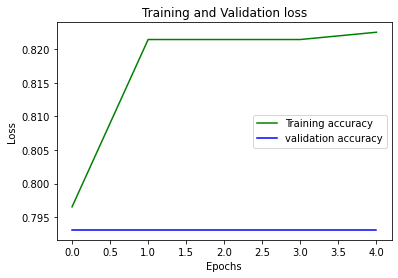

In [ ]:
import matplotlib.pyplot as plt
 
loss_train = history.history['accuracy']

loss_val = history.history['val_accuracy']

epochs = range(1,35)

plt.plot(loss_train, 'g', label='Training accuracy')

plt.plot(loss_val, 'b', label='validation accuracy')

plt.title('Training and Validation loss')

plt.xlabel('Epochs')-

plt.ylabel('Loss')

plt.legend()

plt.show()